# Task 3: To explore supervised machine learning

## K-means clustering

## Importing libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

## Loading the dataset

In [14]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Determining optimum numbers of clusters for K-means classification

In [17]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

In [18]:
for i in range(1,11):
    k_means= KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

## Plotting results

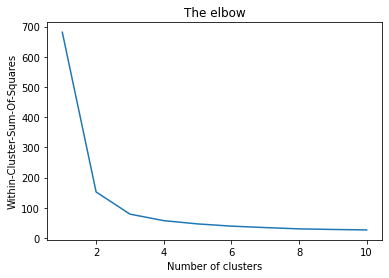

In [19]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster-Sum-Of-Squares')
plt.show()

## Creating the K-means classifier

In [20]:
k_means = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_k_means = k_means.fit_predict(x)

## Representing the clusters visually

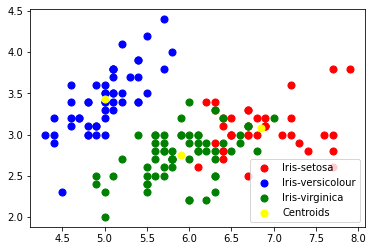

In [21]:
plt.scatter(x[y_k_means == 0, 0], x[y_k_means == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_k_means == 1, 0], x[y_k_means == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_k_means == 2, 0], x[y_k_means == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()